<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 6

In this class, we will formalize how we actualy make a scientific hypothesis and test it. 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 6.0 Overview of Learning Objectives

In this lecture we will explore how to extract parameters from fitting

- What is a hypothesis? 
- 

<br>
<!--end-block-->

## 6.1 Fitting Neutrino data

In this part of the lecture, I would like to fit data from one of the recent Neutrino experiments. The data consists of events at various energies that are observed from neutrino matter iteractions in the NO$\nu$A experiment in Minnesota. Details about this experiment can be found [here]( https://inspirehep.net/files/0a3cd74d55753d242b2a364ce70a5e0e). 

There are 3 type of neutrinos, the electron, muon and $\tau$ neutrino. These neutrinos all interact in roughly the same way, through the weak interaction. Additionally, these neutrinos are all known to be very light. Lastly, it is found that these neutrinos are capable of changing their types over time. What that means is that an electron neutrino can oscillate into a muon neutrino and a $\tau$ neutrino, and a muon the others, and so on. The fact that they oscillate is a bit of a mystery, but what we do know is that this means the way mass is generated for the neutrinos is a different mechanism to the way it interacts.  

To uncerstand the data, we need to consider the key components of this experiment, which is that we first create a beam of neturinos at Fermilab in Illinois, and we then fire this beam at the NO$\nu$A experiment in Minnesota. At NO$\nu$A we check to see what we observe. Since neutrinos intract very weakly, we do this by looking a muon neutrino interactions at a detector at Fermilab, and muon neturino interactions at NO$\nu$A. Between Fermilab and NO$\nu$A what happens is that the neutrinos will oscillate into other neturinos through quantum mechnical mixing. This is a great way to test properties of quantum mechanics, you can read more about that [here](https://arxiv.org/abs/1602.00041). 

That being said, what we expect to compare is a shape by measuring the input beam, with the output shape of the observed events. Since neutrinos interact very weakly, the way we perform this is we put a large detector near the input beam, and we measure the rate of muon neutrinos ,and then we put an even larger detector at the output beam, and we then measure the rate. Lets take a look at this data. 

The data is in root format, like the project. We will use uproot to load the data and see what it is like.  As a reference, you can find the original data location [here](https://nova-docdb.fnal.gov/cgi-bin//ShowDocument?docid=46650).

{'neutrino_mode_nue;1': 'TH1D', 'antineutrino_mode_nue;1': 'TH1D', 'antineutrino_mode_numu_quartile1;1': 'TH1D', 'antineutrino_mode_numu_quartile2;1': 'TH1D', 'antineutrino_mode_numu_quartile3;1': 'TH1D', 'antineutrino_mode_numu_quartile4;1': 'TH1D', 'neutrino_mode_numu_quartile1;1': 'TH1D', 'neutrino_mode_numu_quartile2;1': 'TH1D', 'neutrino_mode_numu_quartile3;1': 'TH1D', 'neutrino_mode_numu_quartile4;1': 'TH1D'}


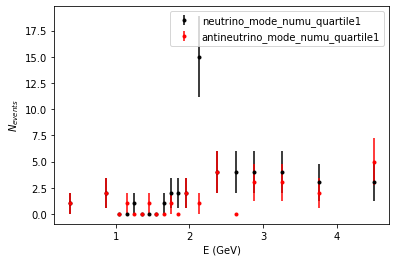

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import uproot

file = uproot.open("NOvA_2020_data_histograms.root")
print(file.classnames())

def plot(iLabel,iFile,iColor):
    bin_edges = iFile[iLabel].axis().edges()
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    plt.xlabel("E (GeV)")
    plt.ylabel("$N_{events}$")
    plt.errorbar(bin_centers,iFile[iLabel].values(),yerr=iFile[iLabel].errors(),marker='.',linestyle = '', color = iColor,label=iLabel)    
    
plot("neutrino_mode_numu_quartile1",file,'black')
plot("antineutrino_mode_numu_quartile1",file,'red')
plt.legend()
plt.show()

    

So, we see two neutrino samples with four quartiles. The quartiles turn out to be different quality selections on the data. Quartile 1 is the most sensitive quartile, whereas Quartile 2,3,4 are less sensitive. How these quartiles are chosen depends on the beam, detector performance, and quality of the reconstruction. For our measurement, we can sum them all up and treat them as one measurement. 

The other label we see is the anti neutrino and neutrino labels are for the type of beam. The beam at fermilab can be run in two different modes. One mode is neutrino mode. In this mode, partilces are fired into the beam that mostly decay into regular neutrinos. The other mode is anti-neutrino mode, in that scenario particles are fired into the beam that decay into anti-neutrinos. 

Suffice it to say there is no gauarantee that anti-particles and particles oscillate with the same parameters, so we keep these samples separate. We can look at the separate quartiles, but lets do that later. 

Instead, lets look at another root file that has the predictions for what we expect the neutrino beam to look like. 

{'prediction_components_nue_fhc;1': 'TDirectory', 'prediction_components_nue_fhc/Signal;1': 'TH1D', 'prediction_components_nue_fhc/Wrong_sign_bkg;1': 'TH1D', 'prediction_components_nue_fhc/Beam_nue_bkg;1': 'TH1D', 'prediction_components_nue_fhc/NC_bkg;1': 'TH1D', 'prediction_components_nue_fhc/NumuCC_bkg;1': 'TH1D', 'prediction_components_nue_fhc/TauCC_bkg;1': 'TH1D', 'prediction_components_nue_fhc/Cosmic_bkg;1': 'TH1D', 'prediction_components_nue_fhc/Total_pred;1': 'TH1D', 'prediction_components_nue_rhc;1': 'TDirectory', 'prediction_components_nue_rhc/Signal;1': 'TH1D', 'prediction_components_nue_rhc/Wrong_sign_bkg;1': 'TH1D', 'prediction_components_nue_rhc/Beam_nue_bkg;1': 'TH1D', 'prediction_components_nue_rhc/NC_bkg;1': 'TH1D', 'prediction_components_nue_rhc/NumuCC_bkg;1': 'TH1D', 'prediction_components_nue_rhc/TauCC_bkg;1': 'TH1D', 'prediction_components_nue_rhc/Cosmic_bkg;1': 'TH1D', 'prediction_components_nue_rhc/Total_pred;1': 'TH1D', 'prediction_components_numu_fhc_Quartile0;1

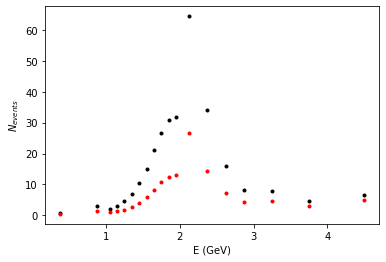

In [34]:
filePred = uproot.open("NOvA_2020_data_release_predictions_with_systs_all_hists.root")
print(filePred.classnames())
plot("prediction_components_numu_fhc_Quartile1/NoOscillations_Total_pred",filePred,'black')
plot("prediction_components_numu_rhc_Quartile1/NoOscillations_Total_pred",filePred,'red')
plt.show()

This file is messy. I won't go into the details but let me put some labels here, to reconcile things. First of all we see prediction_components_rhc_Quartile. Quartile, is the same as before. RHC, and its counterpart FHC standard for "Reverse Horn Current" (RHC) and "Foward Horn Current".   The FHC configuration focuses charged particles with positive polarity (pions,$\pi^{+}$ and Kaons, $K^{+}$) which decay to give a neutrino beam($\nu_{\mu}$) whereas, the RHC configuration focuses charged particles with opposite polarity (pions,$\pi^{-}$ and Kaons, $K^{-}$) that decay to give an anti-neutrino enhanced beam ($\bar{\nu}_{\mu}$). 

Furthermore, the predictions are done under the assumption that there is NoOscillations. Hence, the "NoOscillations" label. 


## 6.2 Neutrino Oscillations

To understand how to fit this data, we follow from the master formula for neutrino oscillations. For those familiar with quantum mechanics, lets write out what the neturino particle eigen-state is:
\begin{equation}
 |\nu_{\mu}\rangle = U^{*}_{\mu1}|\nu_{1}\rangle + U^{*}_{\mu2}|\nu_{2}\rangle + U^{*}_{\mu3}|\nu_{3}\rangle
\end{equation}

Where $U_{\mu i}$ is the muon row of the oscilation matrix. When you time evolve this state and allow the neutrino to move forward a length $L$, you will get that(skipping some steps) 
\begin{eqnarray}
 |\nu_{1}(L)\rangle = e^{-iEt-\vec{p}\cdot\vec{x}}|\nu_{1}\rangle \\
               \approx e^{-i\frac{Lm^{2}_{1}}{2E}}|\nu_{1}(L=0)\rangle
\end{eqnarray}
and, thus, separate mass eigenstates $\nu_{1}$, $\nu_{2}$ and $\nu_{3}$ will evolve at different rates because fo the $m_{1}$ term. What that means is that the probability for neutrinos to still be there can be written by the following master formula: 
\begin{eqnarray}
 P_{\mu\rightarrow\mu} & = &  \left|\langle\nu_{\mu}(L)|\nu_{\mu}(0)\rangle\right|^{2} \\
                       & \approx & 1-\sin^{2}\theta_{23}\sin^{2}\left(\frac{1.27\Delta m^{2}_{23}}{E} L\right)  
\end{eqnarray}
Where $\sin^{2}\theta_{23}$ is the parameter that describes the rate of oscillation between muon neutrinos and $\tau$ neutrinos, and $m^{2}_{23}=m_{3}^2-m_{2}^2$ is the mass difference between the $\tau$ and muon neutrino. You may ask, why is the electron neutrino not involved. It turns out that its rate of oscillations don't impact this measurement. 

Given that, what we can do then is take our original data, divide it by our no oscillation expectation and fit it. In this case, what we would like to extrac is not just one parameter, but two parameters $\theta_{23}$ and $m^{2}_{23}$. Let's see if we can get them. 

First, lets prepare our ratio data. First thing is to construct the ratio for each quantile.

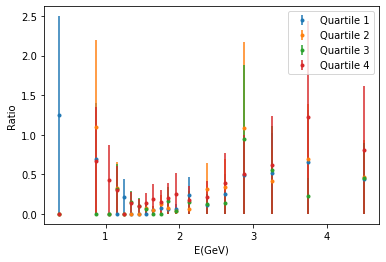

In [183]:
nquartiles=4
label="neutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_fhc_Quartile"
predlabel1="/NoOscillations_Total_pred"
bin_edges=file[label+"1"].axis().edges()
x = 0.5*(bin_edges[1:] + bin_edges[:-1])
def ratio(iQuartile,iPlot=False):
    ytop=file[label+str(i0+1)].values()
    ytop_err=file[label+str(i0+1)].values()
    ybot=filePred[predlabel0+str(i0+1)+predlabel1].values()
    #ybot_err=file[label+str(i0+1)].values() we will skip this since the error is much smaller
    y = ytop/ybot
    y_err = ytop_err/ybot
    if iPlot:
        plt.errorbar(x,y,yerr=y_err,marker='.',linestyle = '',label="Quartile "+str(i0+1))
    return y,y_err
    
for i0 in range(nquartiles):
    ratio(i0,True)
    
plt.xlabel("E(GeV)")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Now, what we would like to do is combine these ratios together. However, we need to do a weighted average weighted by their uncertainties. To do that, we will define for the i-th bin in the ratio $r_{i}$ for the j-th quartile, the [weighted mean](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean)
\begin{equation}
 \bar{r}_{i} = \frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} r_{ij}
\end{equation}
This is the maximum likelihood mean for normally distributed independent variables (see above). The weighted variance is then given by propagation of errors as

\begin{equation}
 \sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)^{2}\sum_{j=1}^{4} \frac{1}{\sigma^{4}_{ij}} \sigma^{2}_{ij} \\
  \sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)^{2}\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} \\
\sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)
\end{equation}


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


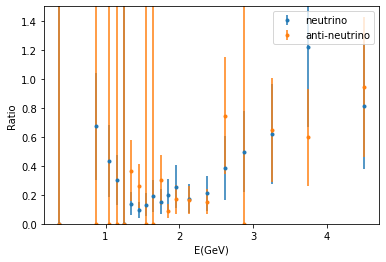

In [184]:
def combinedRatio():
    y,y_err = ratio(0,False)
    y_arrs=np.array([y])
    weight_arrs=np.array([y_err])
    for i0 in range(nquartiles-1):
        y,y_err = ratio(i0,False)
        y_arrs=np.vstack([y_arrs,y])
        weights=1./(y_err**2)
        weights[weights == np.inf] = 0.1
        weight_arrs = np.vstack([weight_arrs,weights])
    #Now do the weighted 
    yout=np.average(y_arrs,weights=weight_arrs,axis=0)
    weights=np.sum(weight_arrs,axis=0)
    return yout,1/weights**0.5,weights**0.5

label="neutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_fhc_Quartile"
y,yerr,weights=combinedRatio()    

label="antineutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_rhc_Quartile"
y_anti,yerr_anti,weights_anti=combinedRatio()    

plt.errorbar(x,y,yerr=yerr,marker='.',linestyle = '',label="neutrino")
plt.errorbar(x,y_anti,yerr=yerr_anti,marker='.',linestyle = '',label="anti-neutrino")
plt.xlabel("E(GeV)")
plt.ylabel("Ratio")
plt.legend()
plt.ylim(0,1.5)
plt.show()

Ok, now that we have the points, lets finally fit the data. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 17
    # variables        = 2
    chi-square         = 4.53860821
    reduced chi-square = 0.30257388
    Akaike info crit   = -18.4500800
    Bayesian info crit = -16.7836533
[[Variables]]
    scale1:  2.34241461 +/- 0.05814050 (2.48%) (init = 1)
    scale2:  0.34204364 +/- 0.01324523 (3.87%) (init = 0.6)
Fit1 chi2 probability:  0.004635484051924957
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 11
    # variables        = 2
    chi-square         = 4.01631702
    reduced chi-square = 0.44625745
    Akaike info crit   = -7.08282950
    Bayesian info crit = -6.28703895
[[Variables]]
    scale1:  2.82315114 +/- 0.11863380 (4.20%) (init = 1)
    scale2:  0.66660988 +/- 0.01813861 (2.72%) (init = 0.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale1, scale2) =  0.176
Fit1 chi2 probability:  0.0896647014546639


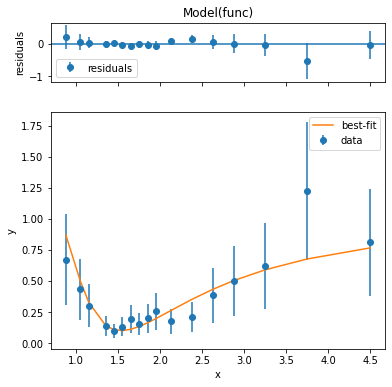

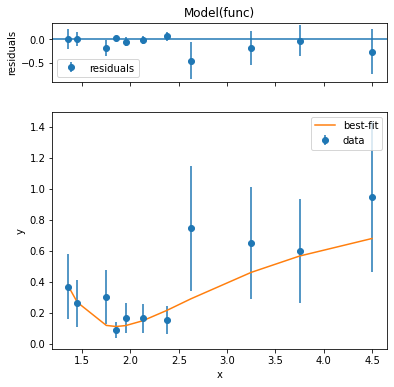

In [185]:
import lmfit
deltam=1*1e-3
L=810
sin2theta23=1.0
def func(x,scale1,scale2):
    xval=1.27*deltam*scale1*L/x
    #val=1-4*scale2*sin2theta23*(1-scale2*sin2theta23)*np.sin(xval)**2
    val=1-4*scale2*(1-scale2)*(np.sin(xval)**2)
    return val

def fit(iX,iY,iWeight):
    model  = lmfit.Model(func)
    p = model.make_params(scale1=1.0,scale2=0.6)
    result = model.fit(x=iX[iY > 0],data=iY[iY > 0], params=p, weights=iWeight[iY > 0])
    lmfit.report_fit(result)
    result.plot()
    print("Fit1 chi2 probability: ",stats.chi2.cdf(result.chisqr,result.nfree))

fit(x,y,weights)
fit(x,y_anti,weights_anti)

## 6.3 Profiling Neutrino Parameters

So we see that neutrinos oscillate. However, what if we want to undrstand how the values of the parameters vary. Lets do a quick scan of the parameters, computing the likelihood for each. 

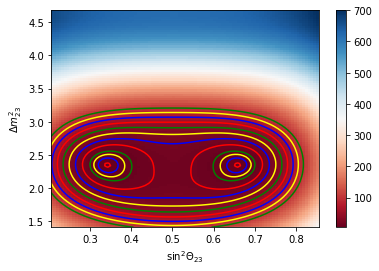

In [200]:
def twoLogLike(var,iX=x,iY=y,iWeights=weights):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    return np.sum(lTot**2)

from scipy import optimize as opt
x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)

def plotScan(sol):
    #Look the same answers, now lets plot the chi2
    xscan = np.linspace(sol.x[0]*0.6,sol.x[0]*2.5, 100)
    yscan = np.linspace(sol.x[1]*0.6,sol.x[1]*2.0, 100)
    X, Y = np.meshgrid(xscan, yscan)
    levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
    for i0 in range(len(levels)):
        levels[i0] = levels[i0]+sol.fun
    Z = np.array([twoLogLike([xscan,yscan]) for (xscan,yscan) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    fig, ax = plt.subplots(1, 1)
    c = ax.pcolor(X,Y,Z,cmap='RdBu')
    fig.colorbar(c, ax=ax)
    c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("$\Delta m^{2}_{23}$")
    plt.show()

plotScan(sol)

So now, we see two circles, what exactly does this mean. Lets profile one variable at a time. 

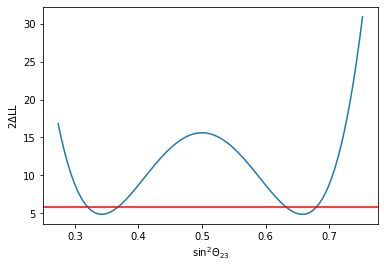

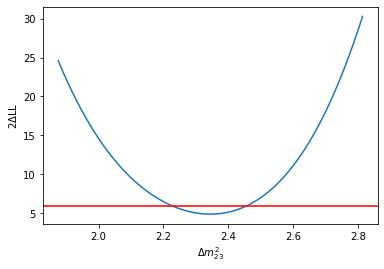

In [199]:
#Now lets fix one parameter at the minimum, and profile the other
def scanAxes(sol):
    xscan = np.linspace(sol.x[0]*0.8,sol.x[0]*2.2, 100)
    yscan = np.linspace(sol.x[1]*0.8,sol.x[1]*1.2, 100)

    xLog = np.array([])
    for pX in xscan:
        xLog = np.append(xLog,twoLogLike(var=[pX,sol.x[1]]))

    yLog = np.array([])
    for pY in yscan:
        yLog = np.append(yLog,twoLogLike(var=[sol.x[0],pY]))

    plt.plot(xscan, xLog,label='loglike');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()

    #Now for the other parameter
    plt.plot(yscan,yLog,label='LL');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\Delta m^{2}_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()
    
scanAxes(sol)

So for $\sin^{2}(\theta_{23})$ there are actually two minima. 

### Challenge

Do the scan for anti-neutrino, do you see a difference in parameters?  A difference in the parameters would mean that anti particles behave differently that regular particles. This is known as [CP-violation](https://en.wikipedia.org/wiki/CP_violation) and can possibly explain why the universe is made of predominatly matter!

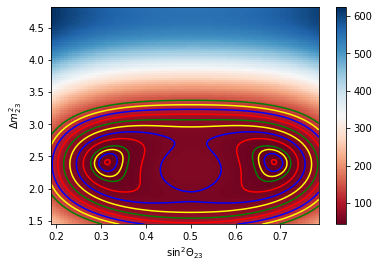

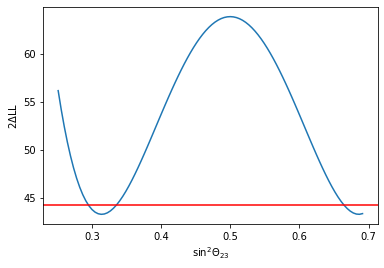

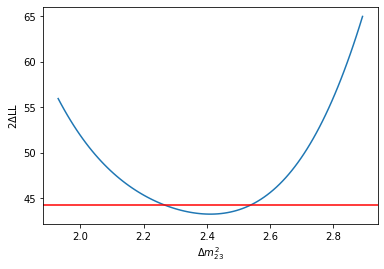

In [201]:
#answer
def twoLogLike(var,iX=x,iY=y_anti,iWeights=weights_anti):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    return np.sum(lTot**2)

x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)
plotScan(sol)
scanAxes(sol)

## 6.4 Combining measurements with constraints from the world

Now lets say, we want to combine this measurment with another measurement. This simplest way to imagine this is that we are minimizing our fit with an additional bin, which is the likelihood that our measurement has deviated from the world average. Our likelihood now will be the product of the probabilities of the best fit parameters, with the new results from NO$\nu$A.  We can write this as

\begin{equation}
\end{equation}

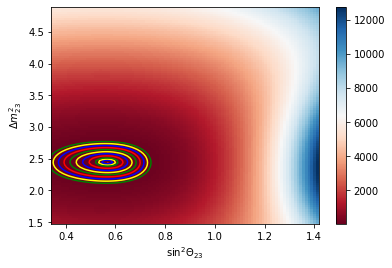

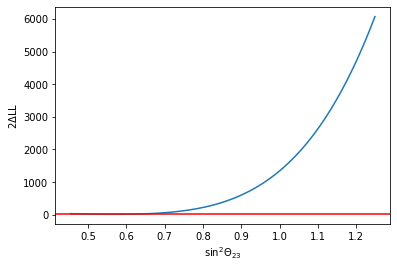

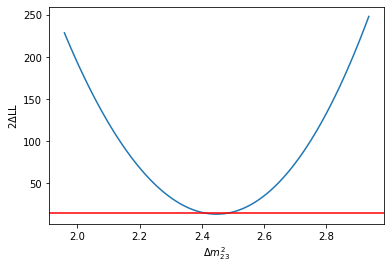

In [204]:
#Now what if we try to add the world's measurement of these parameters into our fit
#https://pdg.lbl.gov/2020/listings/rpp2020-list-neutrino-mixing.pdf
def twoLogLike(var,iX=x,iY=y,iWeights=weights):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    lTot = np.sum(lTot**2)
    sin2worldavg=0.547
    sin2uncavg=0.021
    constraintsin2=((var[0]-sin2worldavg)**2)/(sin2uncavg**2)
    deltamworldavg=2.453
    deltamuncavg=0.034
    constraintdeltam=((var[1]-deltamworldavg)**2)/(deltamuncavg**2)
    return lTot+constraintsin2+constraintdeltam

x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)
plotScan(sol)
scanAxes(sol)

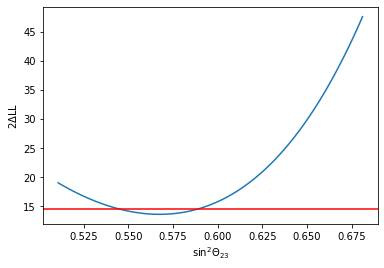

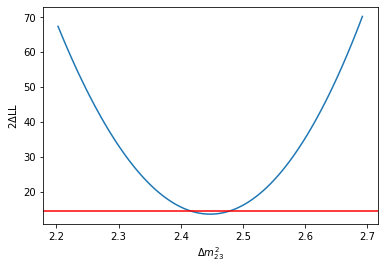

In [205]:
def scanAxes(sol):
    xscan = np.linspace(sol.x[0]*0.9,sol.x[0]*1.2, 100)
    yscan = np.linspace(sol.x[1]*0.9,sol.x[1]*1.1, 100)

    xLog = np.array([])
    for pX in xscan:
        xLog = np.append(xLog,twoLogLike(var=[pX,sol.x[1]]))

    yLog = np.array([])
    for pY in yscan:
        yLog = np.append(yLog,twoLogLike(var=[sol.x[0],pY]))

    plt.plot(xscan, xLog,label='loglike');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()

    #Now for the other parameter
    plt.plot(yscan,yLog,label='LL');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\Delta m^{2}_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()
    
scanAxes(sol)

## 6.5 Convolutions

Convlutions are a critical component of evey good statistical analysis. Its a way to multiply distributions together. 
Lets build convlutions up by scratch and then go from there. 

The core concept of a convolution is that you are effectively multiplying distributions. Given two functions $f(x)$ and $g(x)$, we can define convolutions by 
\begin{eqnarray}
(f*g)(z) &=& \int^{\infty}_{-\infty} f(z-t)g(t)dt
\end{eqnarray}
For data analysis, we usually think about this in the context of probability distribuitons $g$ and $f$. From here, we construct a new probability distribution $(f*g)$. Anyway, lets take a look at how it works. 

To do this, lets first define some functions to convolve. 

In [266]:
#First lets define a triangular distribution
def triangle(x,mean=5):
    Norm=mean*mean
    val=np.where(x <= mean,np.maximum(x,np.zeros(len(x))), np.maximum(2*mean-x,np.zeros(len(x))))
    return val/Norm

#Now define the gaussian
def gaussian(x,mean=0,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 


Now, we need to integrate over a range of one of these functions. 

In [269]:
#Now lets do a convolution by hand
def convolve(f1,f2,x,sigma=1,iMin=-10,iMax=10,iN=2000):
    step=(iMax-iMin)/iN
    pInt=0
    for i0 in range(iN):
            pX   = np.repeat(i0*step+iMin,len(x))
            pVal = f1(x-pX,sigma=sigma)*f2(pX)
            pInt += pVal*step
    return pInt

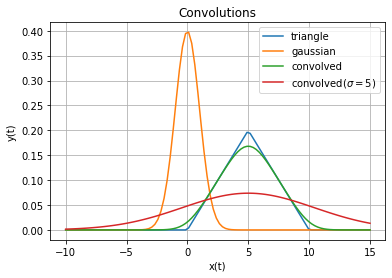

In [273]:
fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
tri_out=triangle(x_in)
gaus_out=gaussian(x_in)
conv_out=convolve(gaussian,triangle,x_in)
conv2_out=convolve(gaussian,triangle,x_in,sigma=5)

ax.plot(x_in,tri_out,label='triangle')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv_out,label='convolved')
ax.plot(x_in,conv2_out,label='convolved($\sigma=5$)')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()